<a href="https://colab.research.google.com/github/dairo117/Challenger---Tiendas-Alura-Store-/blob/main/Challenger_TelecomX_DairoMart%C3%ADnez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

### Extracción

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

archivo = "/content/TelecomX_Data.json"
df_telecom_sin_preprocesar = pd.read_json(archivo)
df_telecom_sin_preprocesar.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Transformación

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.*texto en cursiva*



In [3]:
#Se debe empezar por entender los datos que se tienen. Para esto se emplea la función sample(5) para ver 5 filas aleatorias del
#conjunto de datos y ver cómo se componenen. Además, de la funcion info() que nos da una descripción general de la columnas

df_telecom_sin_preprocesar.sample(5)

,customerID,Churn,customer,phone,internet,account
5496,7531-GQHME,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4838,6621-YOBKI,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2366,3308-DGHKL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
1715,2436-QBZFP,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3705,5117-IFGPS,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
#Seguimos con la información general del DataFrame

df_telecom_sin_preprocesar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Se evidencia que el DataFrame esta conformado por 6 columnas identificadas como: cliente, número de identificación, teléfono, churn (abandono), internet y cuenta.

A continuación se hace una descripción general de las columnas 1 y 2:
* La primera columna identificada como "customerID" contiene los códigos de los clientes, estos son únicos e irrepetibles.
* La segunda columna identificada como "Churn", describe si el cliente sigue en la empresa o si se retiro. Es un binario: Sí o No

Las demás columnas tienen mayor volumen de información el cuál debemos extraer para entender mejor, para esto vamos a normalizar estás columnas.

In [5]:
#Normalización
#Para normalizar vamos a hacer una lista de las columnas del DataFrame. Luego, se realiza otra lista con las columnas que se van a normalizar
columnas_del_df = list(df_telecom_sin_preprocesar.columns)
columnas_a_normalizar = columnas_del_df[2:]
columnas_a_normalizar

['customer', 'phone', 'internet', 'account']

In [6]:
#Para normalizar, las columnas anteriores vamos a usar json_normalize y apply.


#Comencemos por combinar todas las columnas en un solo diccionario para poder emplear json_normalize

columnas_anidadas = df_telecom_sin_preprocesar[columnas_a_normalizar].apply(lambda fila:
    {k:v for diccionario in fila for k,v in diccionario.items()},axis=1)
columnas_anidadas

,0
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."
...,...
7262,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
7263,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7264,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7265,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."


In [7]:
#Luego, normalizamos lo anterior
df_columnas_normlizadas = pd.json_normalize(columnas_anidadas)
df_columnas_normlizadas.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [8]:
#Finalmente combinamos y eliminamos las columnas innecesarias

df_telecom = pd.concat([df_telecom_sin_preprocesar.drop(columns=columnas_a_normalizar),df_columnas_normlizadas],axis=1)
df_telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


A continuación, se presentan diversas variables que resultan útiles para comprender el comportamiento de los usuarios.

En este análisis, se tomará como eje principal la variable churn (abandono o evasión), la cual servirá como base para establecer comparaciones con las demás variables disponibles. El objetivo es identificar patrones y extraer conclusiones relevantes sobre los factores asociados a la evasión de clientes en la compañía Telecom-x.

Como primer paso, se realizará un proceso de limpieza de datos para asegurar la calidad y consistencia del análisis.

### ***Limpieza***


In [10]:
#Se comienza por ver las inconsistencias del DataFrame.
#
# Primero, conozcamos un poco los datos seleccionando una muestra aleatoria de 10 elementos:
df_telecom.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1700,2408-TZMJL,Yes,Male,0,Yes,No,59,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.15,6448.05
6626,9108-EJFJP,No,Female,0,Yes,No,1,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.55,53.55
342,0495-RVCBF,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.70,79.7
6887,9498-FIMXL,No,Female,0,No,No,8,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.20,161.95
6484,8909-BOLNL,No,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,21.20,52.05
5215,7117-EVURU,,Male,0,No,No,39,No,No phone service,DSL,...,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),48.95,1880.85
142,0230-WEQUW,No,Male,0,Yes,No,66,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),56.60,3789.2
7031,9683-PSOSX,,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.55,19.55
124,0208-BPQEJ,No,Female,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,198.1
5308,7247-XOZPB,No,Male,0,Yes,No,53,Yes,Yes,DSL,...,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),77.40,4155.95


In [11]:
#Luego, veamos el tipo de dato y confirmemos que están bien

df_telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
#Veamos que elementos tiene Churn

df_telecom["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

Se muestra que esta columna, tiene strings vacíos. Veamos si las demás tienen.

In [13]:
for col in list(df_telecom.columns):
    if " " in df_telecom[col].unique():
        print(f"La columna {col} tiene el string vacío: ' '")
    elif "" in  df_telecom[col].unique():
        print(f"La columna {col} tiene el string vacío: ''")
    elif "  " in  df_telecom[col].unique():
        print(f"La columna {col} tiene el string vacío: '  '")

La columna Churn tiene el string vacío: ''
La columna Charges.Total tiene el string vacío: ' '


Dos columnas tienen datos vacíos, ahora veamos cuántos.

In [14]:
print(df_telecom["Churn"].value_counts())
print("\n")
print(df_telecom["Charges.Total"].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


Charges.Total
20.2       11
           11
19.75       9
19.55       9
19.9        9
           ..
1993.2      1
72.1        1
1237.85     1
542.4       1
593.3       1
Name: count, Length: 6531, dtype: int64


In [15]:
#Seguimos, ahora se verifica si hay valores duplicados

df_telecom.duplicated()
duplicados=0
if df_telecom.duplicated ==True:
    duplicados +=1
duplicados

0

De las verificaciones anteriores se encontraron inconsistencias. Estas fueron:

* Al hacer un escaneo visual sobre los datos, se evidencia que el nombre de las columnas no es homogéneo, algunos nombres tienen carácteres (como puntos) que revelan desorden.

* Se evidencia con la función *info()* que la columna *Charges.Total* no tiene el tipo correcto de dato.

* Se muestra que la columna *Churn* tiene tiene 224 strings vacíos. Asimismo, la columna *Charges.Total* tiene 11 strings vacíos

***Tratamiento de valores inconsistentes***

Para hacer el tratamiento de los datos, se debe tener en cuenta que el análisis va entorno a encontrar las causas de la deserción de los clientes de la empresa Telecom - X. Por lo que, la variable principal va a ser la variable *Churn* dado que, esta es la que informa directamente si el cliente continua o se ha retirado.

Teniendo en cuenta lo anterior, se debe hacer una limpieza de datos, de las inconsitencias anteriormente encontradas. Esto se hará de la siguiente forma:

* Se cambiarán el nombre de las columnas por un formato: *Nombre_nombre_...* de tal forma que todas queden homogéneas y se pueda acceder a ellas de forma intuitiva.

* Luego, cambiar las columnas (si es necesario) al tipo correcto de dato.

* Finalmente, para manejar los strings vacíos se decidió tratar así:
    - Los datos en *Churn* que están vacíos se eliminarán, dado que, al ser un binario como "Sí" y "No" es muy complicado rellenarlos. Además, son 224 vacíos de 7267 que representa el 3.08% de los datos totales, los cuales no representan una muestra significativa en análisis, y mantenerlos tampoco aportaría mucha información.
    
    - Con respecto a *Charges.Total* al ser solo 11, y ser solo una variable categórica pero que aporta información valiosa en su misma fila, no se eliminará, sencillamente se rellenará con un valor nulo (Nan), esto para hacer el tratamiento de datos sin ningun problema.

In [16]:
#Empecemos por reescribir los nombres de las columnas

df_telecom.rename(columns={'customerID':"Id_cliente", 'Churn':"Retirado", 'gender':"Genero", 'SeniorCitizen':"Adulto_mayor", 'Partner':"Emparejado",
       'Dependents':"Dependientes", 'tenure':"Meses_contrato", 'PhoneService':"Servicio_telefonico", 'MultipleLines':"Multiples_lineas_telefonicas",
       'InternetService':"Servicio_internet", 'OnlineSecurity':"Seguridad_online", 'OnlineBackup':"Respaldo_online", 'DeviceProtection':"Proteccion_dispositivo",
       'TechSupport':"Soporte_tecnico", 'StreamingTV':"Servicio_tv", 'StreamingMovies':"Servicio_peliculas", 'Contract':"Contrato",
       'PaperlessBilling':"Factura_electronica", 'PaymentMethod':"Metodo_pago", 'Charges.Monthly':"Total_mensual",
       'Charges.Total':"Total_gastado"},inplace=True)
df_telecom.head(2)

,Id_cliente,Retirado,Genero,Adulto_mayor,Emparejado,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Respaldo_online,Proteccion_dispositivo,Soporte_tecnico,Servicio_tv,Servicio_peliculas,Contrato,Factura_electronica,Metodo_pago,Total_mensual,Total_gastado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [17]:
#Seguimos por poner todos las columnas en su tipo correcto de dato.
# Para ello, primero se eliminan espacios vacíos y los reemplazamos por NAN,
#esto para no tener problemas al realizar los cambios

df_telecom = df_telecom.replace(' ', np.nan).replace('', np.nan)

In [18]:
#Cambiamos de object a float en la columna Total_gastado

df_telecom["Total_gastado"] = df_telecom["Total_gastado"].astype(np.float64)
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id_cliente                    7267 non-null   object 
 1   Retirado                      7043 non-null   object 
 2   Genero                        7267 non-null   object 
 3   Adulto_mayor                  7267 non-null   int64  
 4   Emparejado                    7267 non-null   object 
 5   Dependientes                  7267 non-null   object 
 6   Meses_contrato                7267 non-null   int64  
 7   Servicio_telefonico           7267 non-null   object 
 8   Multiples_lineas_telefonicas  7267 non-null   object 
 9   Servicio_internet             7267 non-null   object 
 10  Seguridad_online              7267 non-null   object 
 11  Respaldo_online               7267 non-null   object 
 12  Proteccion_dispositivo        7267 non-null   object 
 13  Sop

Ahora, trataremos la columna (serie) *"Retirado"* anteriormente llamada Churn. Empezamos por crear el filtro de datos que son diferentes a "Yes" y "No".

In [20]:
#Filtro de datos a diferentes a Yes o No

df_telecom_Retirado_invalidas = df_telecom[~df_telecom['Retirado'].isin(['Yes', 'No'])]

In [21]:
df_telecom_Retirado_invalidas.index

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

In [22]:
#Eliminamos los datos invalidos (vacíos) de Churn del DataFrame

df_telecom = df_telecom.drop(df_telecom_Retirado_invalidas.index)
df_telecom.shape

(7043, 21)

In [23]:
#Terminamos con reiniciar los índices
df_telecom.reset_index(inplace = True, drop = True)
df_telecom.tail(2)

,Id_cliente,Retirado,Genero,Adulto_mayor,Emparejado,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Respaldo_online,Proteccion_dispositivo,Soporte_tecnico,Servicio_tv,Servicio_peliculas,Contrato,Factura_electronica,Metodo_pago,Total_mensual,Total_gastado
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7042,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


Aún no hemos terminado, se sigue por la limpieza de los strings. Enseguida se eliminarán espacios sobrantes, carácteres innecesarios y demás arreglos que se necesiten.

In [24]:
#Empezamos con "Id_cliente", eliminamos posibles espacios innecesarios

df_telecom["Id_cliente"] = df_telecom["Id_cliente"].str.strip()

In [25]:
#Ahora tratamos la columna "Contrato"

df_telecom["Contrato"] = df_telecom["Contrato"].str.strip()
df_telecom["Contrato"] = df_telecom["Contrato"].str.lower()
df_telecom["Contrato"] = df_telecom["Contrato"].str.replace("-"," ")
df_telecom["Contrato"].sample(3)

,Contrato
481,month to month
826,one year
4128,month to month


In [26]:
#Ahora se hace lo mismo con "Metodo_pago"

df_telecom["Metodo_pago"] = df_telecom["Metodo_pago"].str.lower()
df_telecom["Metodo_pago"] = df_telecom["Metodo_pago"].str.replace("(","")
df_telecom["Metodo_pago"] = df_telecom["Metodo_pago"].str.replace(")","")
df_telecom["Metodo_pago"].sample(3)

,Metodo_pago
2067,credit card automatic
3092,electronic check
2137,mailed check


Para terminar dicha sección, se crea una nueva columna denominada "Cuentas_Diarias".

In [27]:
df_telecom["Cuentas_diarias"] = df_telecom["Total_mensual"]/30.42  #365/12 = 30.42
df_telecom[["Total_mensual","Cuentas_diarias"]].tail()

,Total_mensual,Cuentas_diarias
7038,55.15,1.812952
7039,85.10,2.797502
7040,50.30,1.653517
7041,67.85,2.230440
7042,59.00,1.939513


### Carga y Análisis


Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.


***Análisis Descriptivo***

In [28]:
df_telecom.describe()

,Adulto_mayor,Meses_contrato,Total_mensual,Total_gastado,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.128918
std,0.368612,24.559481,30.090047,2266.771362,0.989153
min,0.000000,0.000000,18.250000,18.800000,0.599934
25%,0.000000,9.000000,35.500000,401.450000,1.166995
50%,0.000000,29.000000,70.350000,1397.475000,2.312623
75%,0.000000,55.000000,89.850000,3794.737500,2.953649
max,1.000000,72.000000,118.750000,8684.800000,3.903682


***Distribución de evasión***

En este paso, el objetivo es comprender la distribución de clientes se retiran y de los que permanecen. Para ellos se utilizarán gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [29]:
cant_clientes_retirados = df_telecom["Retirado"].value_counts().get("Yes",0)
cant_clientes_permanecen = df_telecom["Retirado"].value_counts().get("No",0)

print(f"""La cantidad de clientes que se han retirado de la empresa son: {cant_clientes_retirados}
La cantidad de clientes que continuan en la empresa son: {cant_clientes_permanecen}""")

La cantidad de clientes que se han retirado de la empresa son: 1869
La cantidad de clientes que continuan en la empresa son: 5174


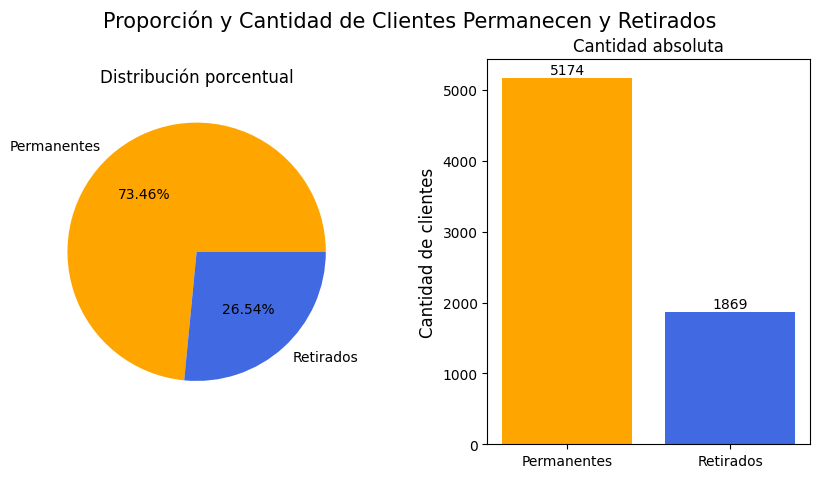

In [31]:
#Gráficamos el anterior resultado

etiquetas = ["Permanentes", "Retirados"]
cant_clientes = [cant_clientes_permanecen,cant_clientes_retirados]

fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.subplots_adjust(wspace=0.4)
fig.suptitle("Proporción y Cantidad de Clientes Permanecen y Retirados",fontsize=15)


axs[0].pie(cant_clientes,labels=etiquetas,autopct="%1.2f%%",colors=["orange","royalblue"])
axs[0].set_title("Distribución porcentual")


axs[1].bar(etiquetas, cant_clientes, color=["orange","royalblue"])
axs[1].set_title("Cantidad absoluta")
axs[1].set_ylabel("Cantidad de clientes",fontsize=12)

for i, j in enumerate(cant_clientes):
    axs[1].text(i, j + max(cant_clientes)*0.01, str(j), ha='center', fontsize=10)

plt.show()

***Recuento de evasión por variables categóricas***

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [32]:
#Género

hombres_retirados=df_telecom.query("Genero=='Male' & Retirado=='Yes'")["Genero"].count()
hombres_permanecen=df_telecom.query("Genero=='Male' & Retirado=='No'")["Genero"].count()

mujeres_retiradas=df_telecom.query("Genero=='Female' & Retirado=='Yes'")["Genero"].count()
mujeres_permanecen=df_telecom.query("Genero=='Female' & Retirado=='No'")["Genero"].count()

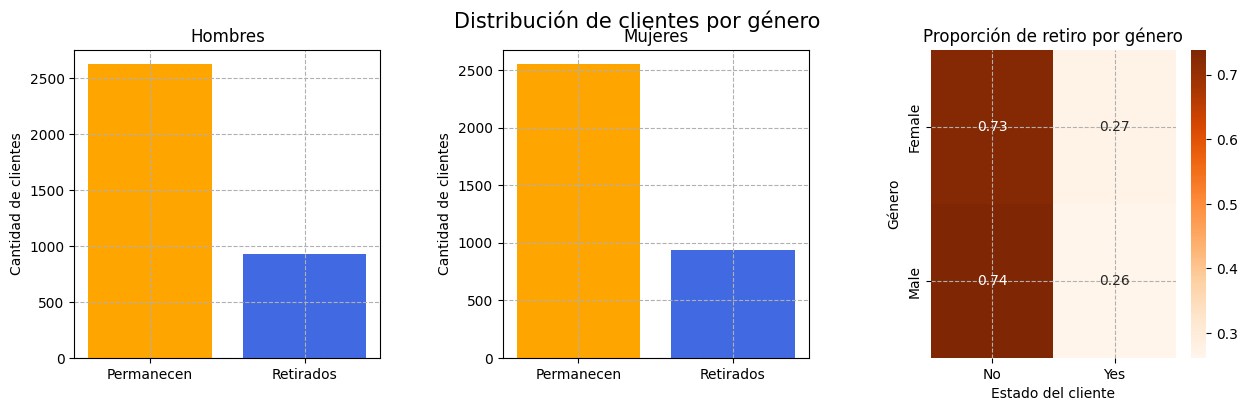

In [35]:
categorias = ["Hombres", "Mujeres"]

# Crear figura y ejes
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(wspace=0.4)
fig.suptitle("Distribución de clientes por género", fontsize=15)

# Gráfico de barras - Hombres
axs[0].bar(["Permanecen", "Retirados"], [hombres_permanecen, hombres_retirados], color=["orange", "royalblue"])
axs[0].set_title("Hombres")
axs[0].set_ylabel("Cantidad de clientes")

# Gráfico de barras - Mujeres
axs[1].bar(["Permanecen", "Retirados"], [mujeres_permanecen, mujeres_retiradas], color=["orange", "royalblue"])
axs[1].set_title("Mujeres")
axs[1].set_ylabel("Cantidad de clientes")

# Mapa de calor con otra paleta de colores
tabla = pd.crosstab(df_telecom['Genero'],
                    df_telecom['Retirado'],
                    normalize='index')

# Paletas alternativas: "YlGnBu", "coolwarm", "Oranges", "BuPu"
sns.heatmap(tabla, annot=True, cmap="Oranges", fmt=".2f", ax=axs[2])
axs[2].set_title("Proporción de retiro por género")
axs[2].set_xlabel("Estado del cliente")
axs[2].set_ylabel("Género")

for ax in axs.flat:
    ax.grid(linestyle="--")

plt.show()

Se puede observar que el género no tiene relación directa con la decersión de clientes de la empresa Telecom - X

In [36]:
#Ahora, hacmos el análisis respecto a la variable de contrato
df_contrato = df_telecom[["Retirado","Contrato"]]

#mes a mes

df_contrato_mensual = df_contrato.query("Contrato=='month to month'")

df_contrato_mensual_retirado = df_contrato_mensual.query("Retirado=='Yes'")
df_contrato_mensual_permanecen = df_contrato_mensual.query("Retirado=='No'")

#Año

df_contrato_anual = df_contrato.query("Contrato=='one year'")

df_contrato_anual_retirado = df_contrato_anual.query("Retirado=='Yes'")
df_contrato_anual_permanecen = df_contrato_anual.query("Retirado=='No'")

# 2 años

df_contrato_cada_2_años = df_contrato.query("Contrato=='two year'")

df_contrato_cada_2_años_retirado = df_contrato_cada_2_años.query("Retirado=='Yes'")
df_contrato_cada_2_años_permanecen = df_contrato_cada_2_años.query("Retirado=='No'")


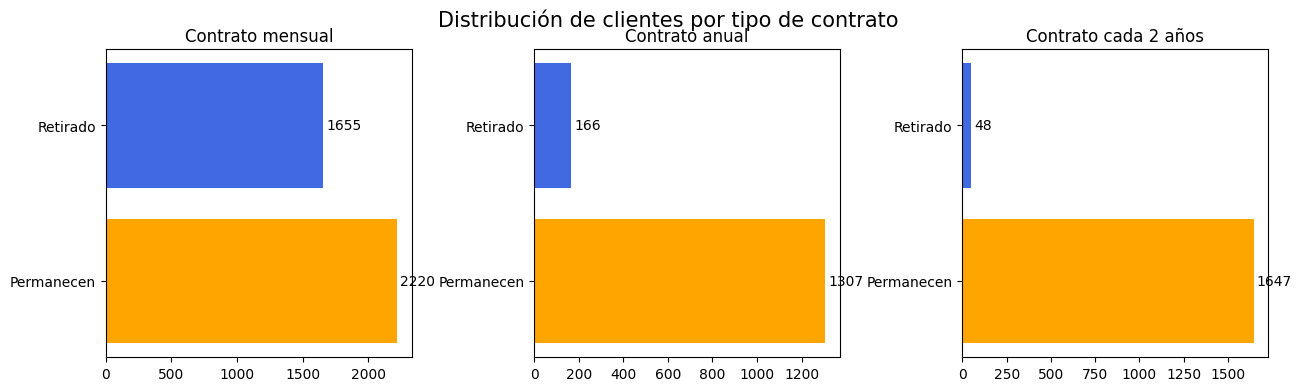

In [37]:

contratos = ["Mensual", "Anual", "Cada 2 años"]
colores = ["orange", "royalblue"]

# Cantidades
data_mensual = [len(df_contrato_mensual_permanecen), len(df_contrato_mensual_retirado)]
data_anual = [len(df_contrato_anual_permanecen), len(df_contrato_anual_retirado)]
data_2anos = [len(df_contrato_cada_2_años_permanecen), len(df_contrato_cada_2_años_retirado)]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Distribución de clientes por tipo de contrato", fontsize=15)
fig.subplots_adjust(wspace=0.4)

# Contrato mensual
axs[0].barh(["Permanecen", "Retirado"], data_mensual, color=colores)
axs[0].set_title("Contrato mensual")
for i, v in enumerate(data_mensual):
    axs[0].text(v + max(data_mensual)*0.01, i, str(v), va='center', fontsize=10)

# Contrato anual
axs[1].barh(["Permanecen", "Retirado"], data_anual, color=colores)
axs[1].set_title("Contrato anual")
for i, v in enumerate(data_anual):
    axs[1].text(v + max(data_anual)*0.01, i, str(v), va='center', fontsize=10)

# Contrato cada 2 años
axs[2].barh(["Permanecen", "Retirado"], data_2anos, color=colores)
axs[2].set_title("Contrato cada 2 años")
for i, v in enumerate(data_2anos):
    axs[2].text(v + max(data_2anos)*0.01, i, str(v), va='center', fontsize=10)

plt.show()

Se puede ver una gran cantidad de retiros respecto a los contratos que se hacen de forma mensual

In [38]:
#Método de pago

df_metodo_de_pago = df_telecom[["Retirado","Metodo_pago"]]

#Cheque enviado por correo

df_cheque_por_correo = df_metodo_de_pago.query("Metodo_pago=='mailed check'")

df_cheque_por_correo_retirado = df_cheque_por_correo.query("Retirado=='Yes'")
df_cheque_por_correo_permanecen = df_cheque_por_correo.query("Retirado=='No'")

#Cheque Electrónico

df_cheque_electronico = df_metodo_de_pago.query("Metodo_pago=='electronic check'")

df_cheque_electronico_retirado = df_cheque_electronico.query("Retirado=='Yes'")
df_cheque_electronico_permanecen = df_cheque_electronico.query("Retirado=='No'")

# Terjeta de crédito automática

df_tarjeta_credito = df_metodo_de_pago.query("Metodo_pago=='credit card automatic'")

df_tarjeta_credito_retirado = df_tarjeta_credito.query("Retirado=='Yes'")
df_tarjeta_credito_permanecen = df_tarjeta_credito.query("Retirado=='No'")

# Transferencia bancaria automática

df_transferencia_bancaria = df_metodo_de_pago.query("Metodo_pago=='bank transfer automatic'")

df_transferencia_bancaria_retirado = df_transferencia_bancaria.query("Retirado=='Yes'")
df_transferencia_bancaria_permanecen = df_transferencia_bancaria.query("Retirado=='No'")

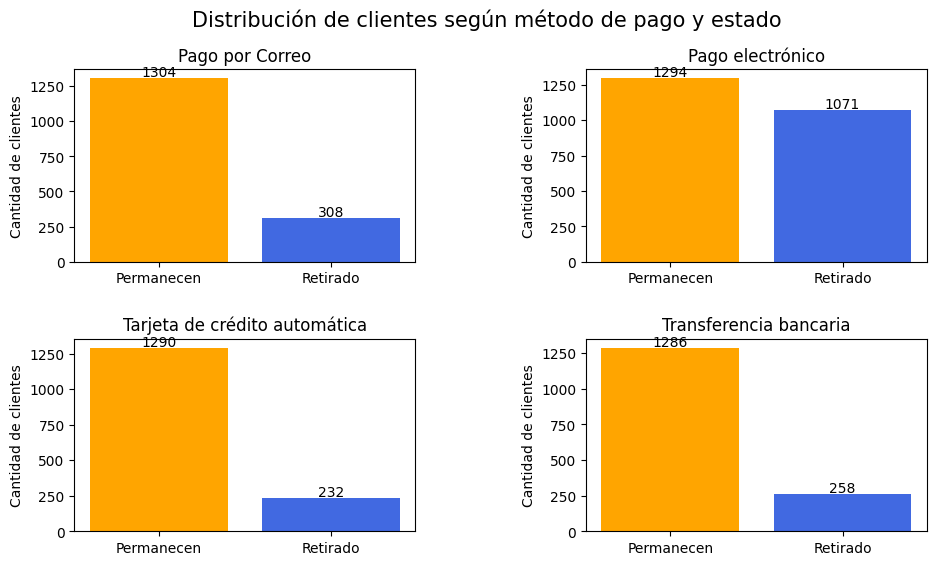

In [39]:
etiquetas = ["Permanecen", "Retirado"]
colores = ["orange", "royalblue"]

fig, axs = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle("Distribución de clientes según método de pago y estado", fontsize=15)
fig.subplots_adjust(hspace=0.4, wspace=0.5)

# Subgráfico 1
val1 = [len(df_cheque_por_correo_permanecen), len(df_cheque_por_correo_retirado)]
axs[0,0].bar(etiquetas, val1, color=colores)
axs[0,0].set_title("Pago por Correo")
for i, v in enumerate(val1):
    axs[0,0].text(i, v + max(val1)*0.01, str(v), ha='center', fontsize=10)

# Subgráfico 2
val2 = [len(df_cheque_electronico_permanecen), len(df_cheque_electronico_retirado)]
axs[0,1].bar(etiquetas, val2, color=colores)
axs[0,1].set_title("Pago electrónico")
for i, v in enumerate(val2):
    axs[0,1].text(i, v + max(val2)*0.01, str(v), ha='center', fontsize=10)

# Subgráfico 3
val3 = [len(df_tarjeta_credito_permanecen), len(df_tarjeta_credito_retirado)]
axs[1,0].bar(etiquetas, val3, color=colores)
axs[1,0].set_title("Tarjeta de crédito automática")
for i, v in enumerate(val3):
    axs[1,0].text(i, v + max(val3)*0.01, str(v), ha='center', fontsize=10)

# Subgráfico 4
val4 = [len(df_transferencia_bancaria_permanecen), len(df_transferencia_bancaria_retirado)]
axs[1,1].bar(etiquetas, val4, color=colores)
axs[1,1].set_title("Transferencia bancaria")
for i, v in enumerate(val4):
    axs[1,1].text(i, v + max(val4)*0.01, str(v), ha='center', fontsize=10)

# Añadir grillas a todos
for ax in axs.flat:
    ax.set_ylabel("Cantidad de clientes")

plt.show()


Se puede ver una gran cantidad de retiros respecto a los que pagan de forma electrónica

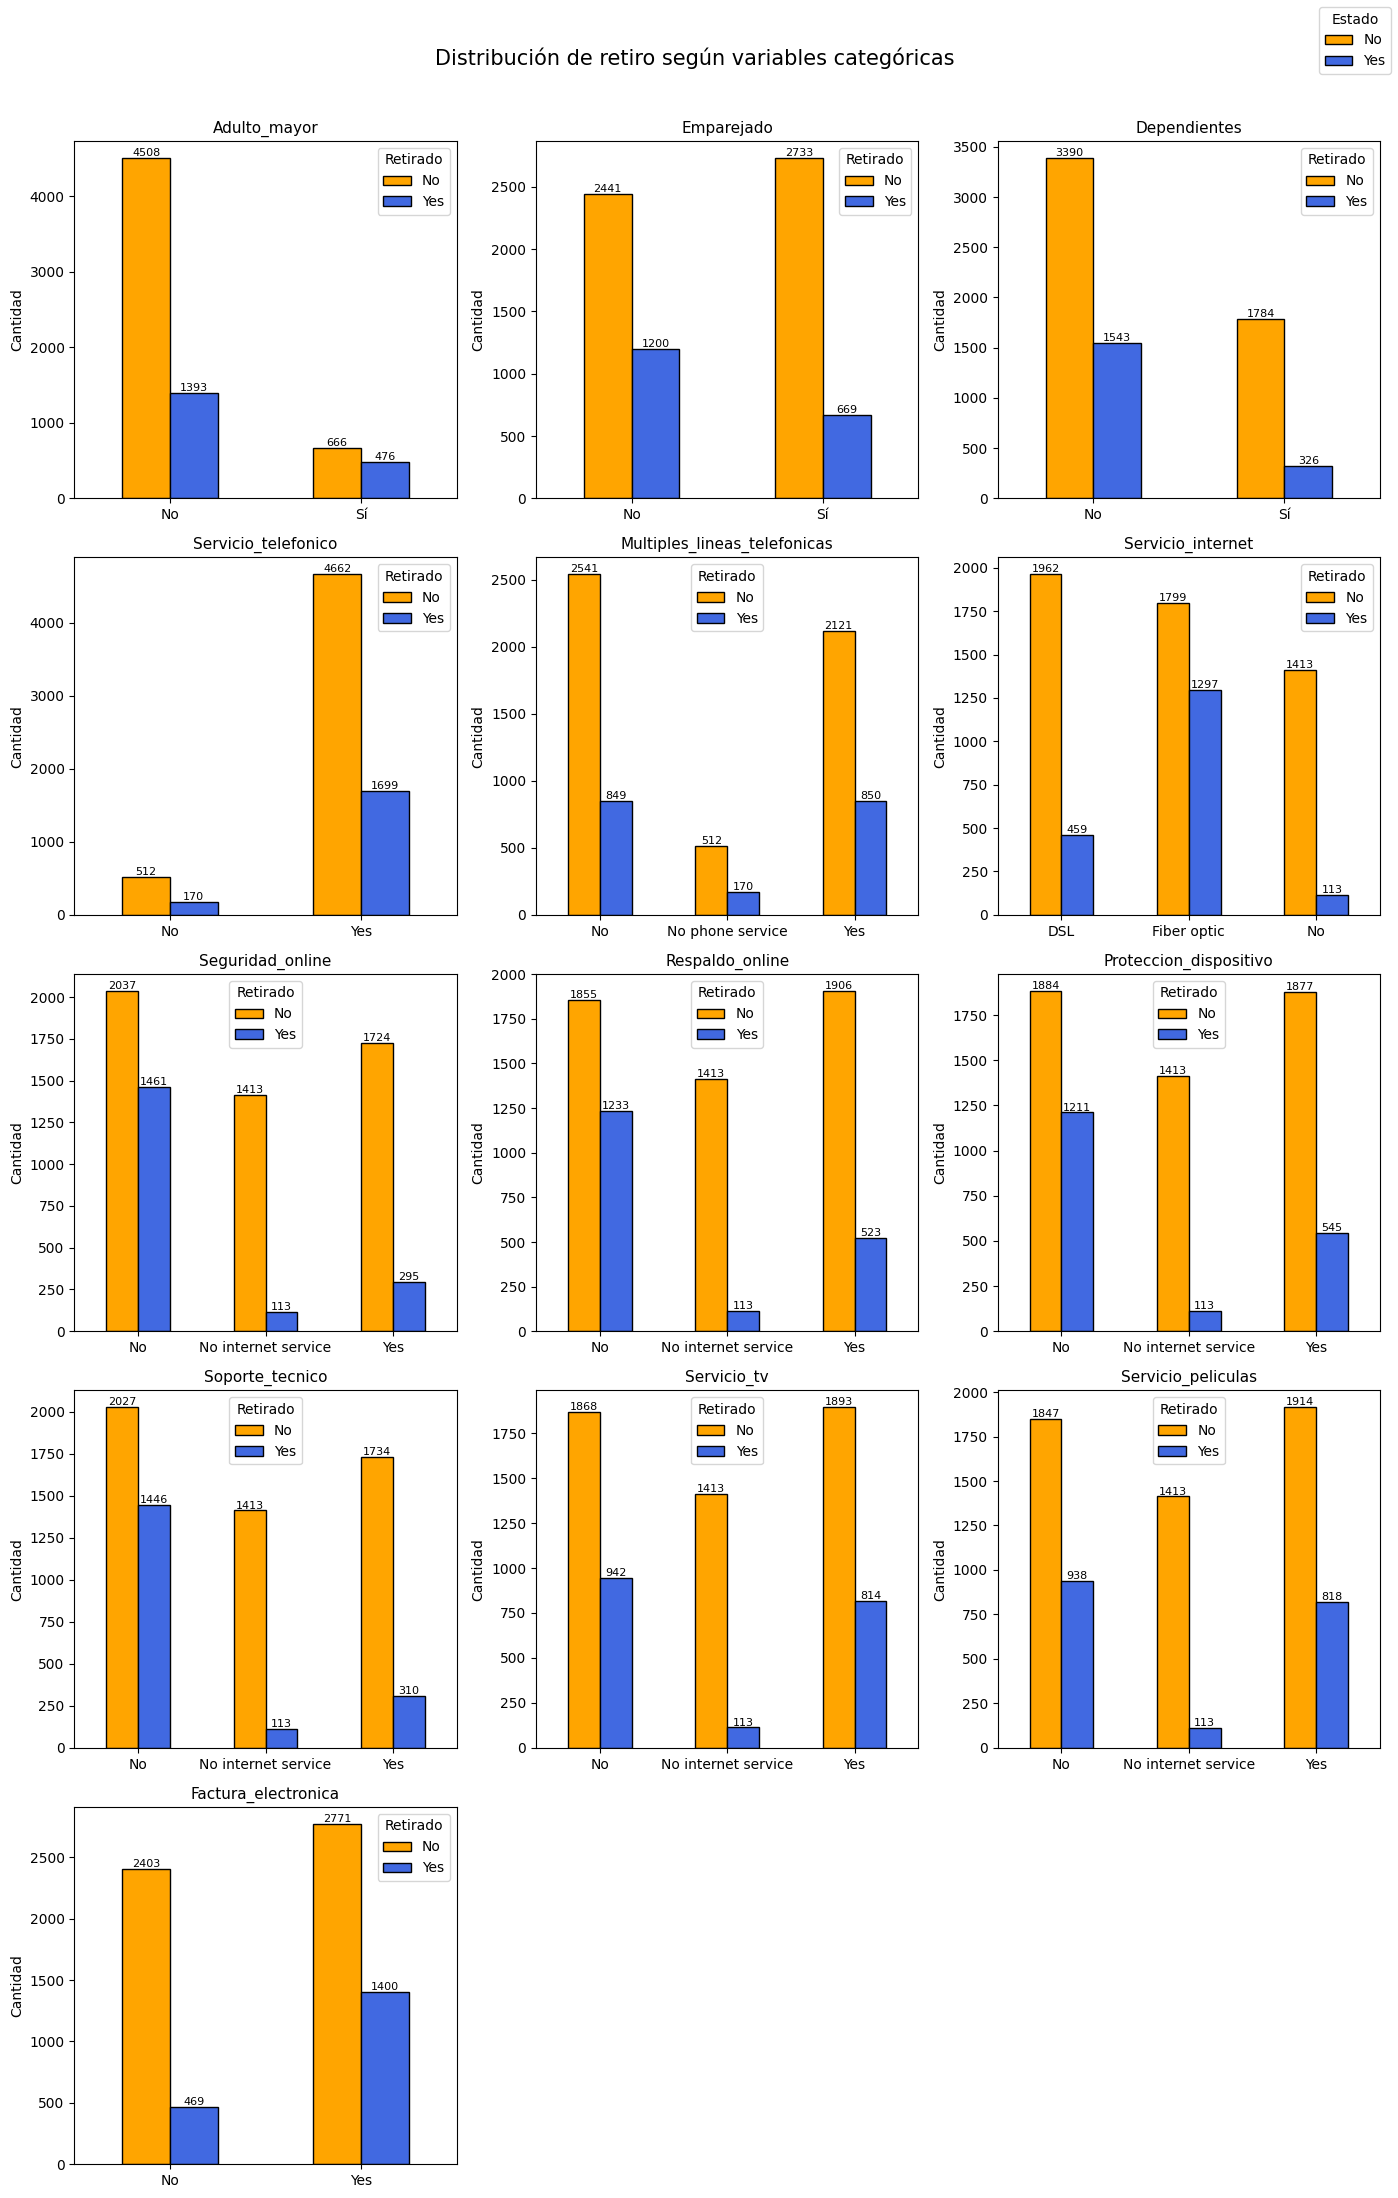

In [40]:
#Otras variables categóricas

import math

col_variables = ['Adulto_mayor', 'Emparejado',
       'Dependientes', 'Servicio_telefonico',
       'Multiples_lineas_telefonicas', 'Servicio_internet', 'Seguridad_online',
       'Respaldo_online', 'Proteccion_dispositivo', 'Soporte_tecnico',
       'Servicio_tv', 'Servicio_peliculas', 'Factura_electronica']

filas = len(col_variables)
n_filas = math.ceil(filas / 3)

fig, axs = plt.subplots(n_filas, 3, figsize=(14, 22))
axs = axs.flatten()

for i, columna in enumerate(col_variables):
    df_col = df_telecom[[columna, "Retirado"]]
    conteo = df_col.groupby([columna, "Retirado"]).size().unstack(fill_value=0)

    conteo.plot(kind='bar', ax=axs[i], color=["orange", "royalblue"], edgecolor="black")
    axs[i].set_title(columna, fontsize=11)
    axs[i].set_ylabel("Cantidad")
    axs[i].set_xlabel("")


    if columna == "Adulto_mayor":
        axs[i].set_xticklabels(["No","Sí"])
    elif columna == "Emparejado":
        axs[i].set_xticklabels(["No","Sí"])
    elif columna == "Dependientes":
        axs[i].set_xticklabels(["No","Sí"])

    for p in axs[i].patches:
        altura = p.get_height()
        if altura > 0:
            axs[i].annotate(f'{int(altura)}',
                            (p.get_x() + p.get_width() / 2, altura),
                            ha='center', va='bottom', fontsize=8)

    axs[i].tick_params(axis='x', rotation=0)

# Ocultar ejes vacíos
for j in range(filas, len(axs)):
    fig.delaxes(axs[j])

# Título general
fig.suptitle("Distribución de retiro según variables categóricas", fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.97])
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title="Estado")

plt.show()

Se evidencia que hay una cantidad considerable de retiros con respecto a las siguientes variables:

* Adulto mayor: La proporcion entre adutltos mayores que permanecen y se retiran es muy parecida.

* Servicio de internet : Se ve que una gran deserción en los que tienen fibra óptica.

* Servicio de internet: Los que contratan servicio de televisión también tienen una gran proporción a retirarse.

* Servicio de películas: Los que contratan servicio de televisión también tienen una gran proporción a retirarse.

* Factura electrónica: Se ve que una gran deserción en los que contratan factura elctrónica.

***Conteo de evasión por variables numéricas***


En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [41]:
#variables numéricas

# Meses de contrato

df_meses_retirado = df_telecom[["Retirado", "Meses_contrato"]].query("Retirado=='Yes'").sort_values("Meses_contrato")
df_meses_permanecen= df_telecom[["Retirado", "Meses_contrato"]].query("Retirado=='No'").sort_values("Meses_contrato")

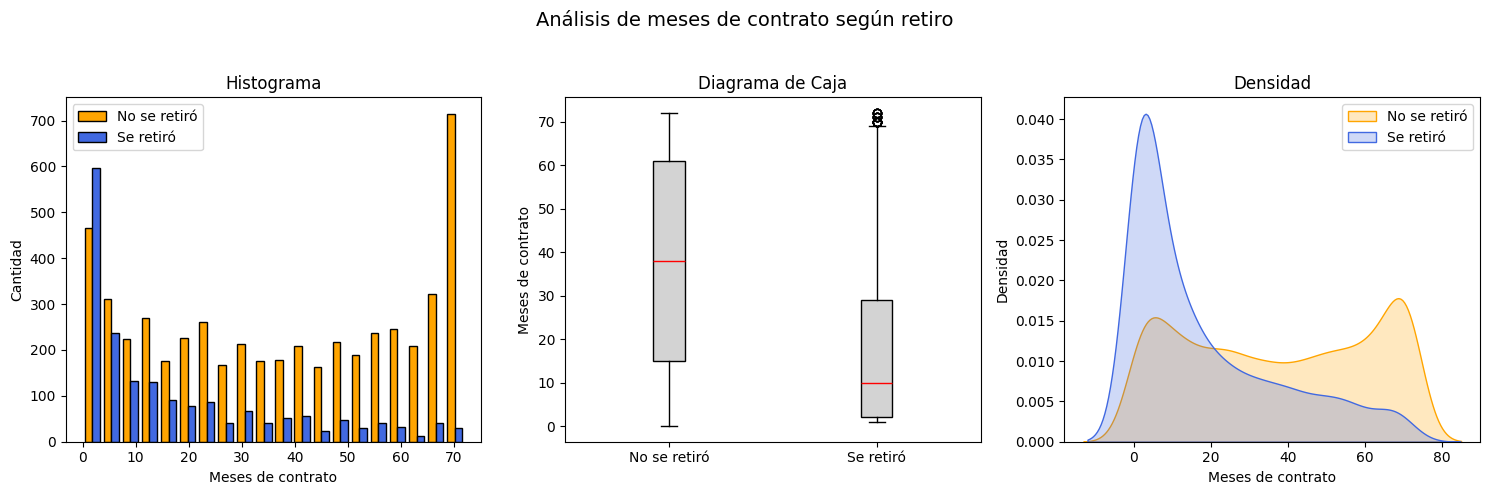

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Análisis de meses de contrato según retiro", fontsize=14)

# Histograma
axs[0].hist([df_meses_permanecen["Meses_contrato"], df_meses_retirado["Meses_contrato"]],
            label=["No se retiró", "Se retiró"],
            color=["orange", "royalblue"],
            bins=20, edgecolor="black")
axs[0].set_title("Histograma")
axs[0].set_xlabel("Meses de contrato")
axs[0].set_ylabel("Cantidad")
axs[0].legend()

# Boxplot
axs[1].boxplot([df_meses_permanecen["Meses_contrato"], df_meses_retirado["Meses_contrato"]],
               patch_artist=True,
               boxprops=dict(facecolor="lightgray", color="black"),
               medianprops=dict(color="red"))
axs[1].set_title("Diagrama de Caja")
axs[1].set_xticklabels(["No se retiró", "Se retiró"])
axs[1].set_ylabel("Meses de contrato")

# KDE (curva de densidad)
sns.kdeplot(df_meses_permanecen["Meses_contrato"], label="No se retiró", fill=True, color="orange", ax=axs[2])
sns.kdeplot(df_meses_retirado["Meses_contrato"], label="Se retiró", fill=True, color="royalblue", ax=axs[2])
axs[2].set_title("Densidad")
axs[2].set_xlabel("Meses de contrato")
axs[2].set_ylabel("Densidad")
axs[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título
plt.show()


Se evidencia que en los primeros meses es el mayor rango de retiro de los clientes. Tal es el caso que la gráfica de densida muestra que los clientes que se retiran son mayores a los que permanecen en los primeros 20 meses de contrato.

In [44]:
#gastos totales

df_gastos_totales_retirados = df_telecom[["Retirado", "Total_gastado"]].query("Retirado=='Yes'").sort_values("Total_gastado")
df_gastos_totales_permanecen= df_telecom[["Retirado", "Total_gastado"]].query("Retirado=='No'").sort_values("Total_gastado")

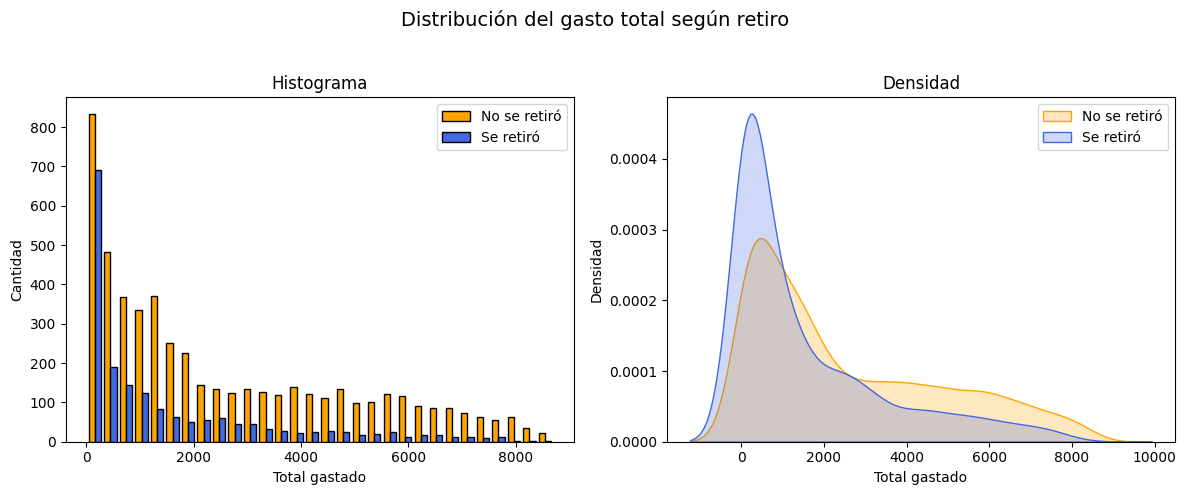

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribución del gasto total según retiro", fontsize=14)

# Histograma
axs[0].hist(
    [df_gastos_totales_permanecen["Total_gastado"], df_gastos_totales_retirados["Total_gastado"]],
    label=["No se retiró", "Se retiró"],
    color=["orange", "royalblue"],
    bins=30,
    edgecolor="black"
)
axs[0].set_title("Histograma")
axs[0].set_xlabel("Total gastado")
axs[0].set_ylabel("Cantidad")
axs[0].legend()

# Curvas de densidad (KDE)
sns.kdeplot(df_gastos_totales_permanecen["Total_gastado"], label="No se retiró", fill=True, color="orange", ax=axs[1])
sns.kdeplot(df_gastos_totales_retirados["Total_gastado"], label="Se retiró", fill=True, color="royalblue", ax=axs[1])
axs[1].set_title("Densidad")
axs[1].set_xlabel("Total gastado")
axs[1].set_ylabel("Densidad")
axs[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Se ve que los mayores retiros se presentan en gastos bajos, posiblemente relacionado a los primeros meses de contrato

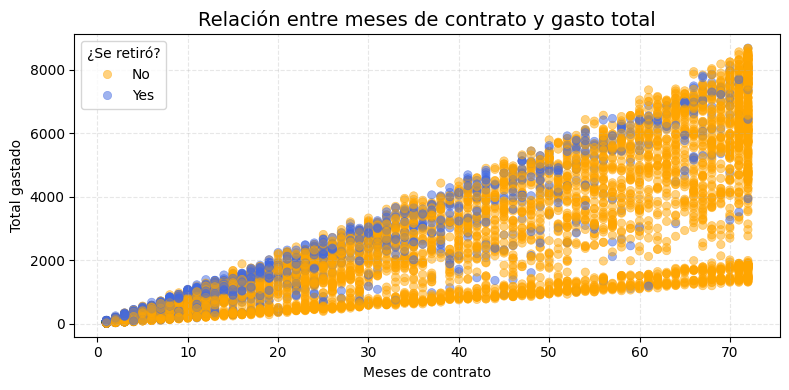

In [47]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df_telecom,
    x="Meses_contrato",
    y="Total_gastado",
    hue="Retirado",
    palette={"No": "orange", "Yes": "royalblue"},
    alpha=0.5,
    edgecolor=None  # sin borde negro para los puntos
)

plt.title("Relación entre meses de contrato y gasto total", fontsize=14)
plt.xlabel("Meses de contrato")
plt.ylabel("Total gastado")
plt.legend(title="¿Se retiró?")
plt.grid(linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# **Informe final** 🚀


##  **Introducción** ##

El presente análisis tiene como objetivo identificar las causas por las cuales los clientes abandonan los servicios ofrecidos por la compañía Telecom-X.

Esta problemática representa un reto significativo para la empresa, ya que presenta una tasa de deserción cercana al 27%, un valor considerablemente alto que se traduce en pérdidas económicas. La disminución en la base de clientes impacta directamente en los ingresos, y además, atraer nuevos usuarios suele implicar mayores costos que retener a los actuales. Por ello, comprender los motivos detrás del abandono resulta crucial para diseñar estrategias orientadas a mejorar la experiencia del cliente y, con ello, reducir la tasa de evasión.

Con este propósito, se aplicaron técnicas de ETL (Extracción, Transformación y Carga) junto con un análisis exploratorio de los datos. El estudio se centró en la variable Churn (abandono), y se examinaron sus relaciones con distintos factores, como el tiempo de permanencia del cliente, los servicios contratados (telefonía, internet), los costos asociados y otras variables relevantes.

## **Limpieza y Tratamiento de Datos**

El proceso de limpieza y tratamiento de los datos se llevó a cabo siguiendo una serie de pasos estructurados, con el objetivo de preparar la información para un análisis preciso y confiable. Las acciones realizadas fueron las siguientes:

* Se importó la biblioteca pandas, fundamental para la manipulación y análisis de datos en Python.

* Se accedió a los datos a través de una API, los cuales estaban en formato JSON.

* Se creó un DataFrame a partir de los datos obtenidos, utilizando las funcionalidades que ofrece la biblioteca pandas.

* Se procedió a la normalización de los datos, asegurando una estructura uniforme y coherente.

* Se renombraron las columnas con nombres más intuitivos, organizados y de fácil comprensión, facilitando su interpretación durante el análisis.

* Se ajustaron los tipos de datos para que correspondieran correctamente a su naturaleza (por ejemplo, fechas, números, cadenas de texto, etc.).

* Se identificaron y corrigieron inconsistencias presentes en los datos.

* Se realizó un tratamiento de los valores de tipo string, estandarizando su formato y eliminando caracteres irrelevantes para el análisis.

* Finalmente, se identificaron y eliminaron los registros duplicados, garantizando la integridad del conjunto de datos.

![Descripción opcional](https://drive.google.com/uc?export=view&id=1_YAWxjzVw0aaDNBTv0jpxq5XZxRIl-CZ)

## **Análisis Exploratorio de Datos** ##

El análisis se centró en la variable Churn (retiro), con el objetivo de identificar los factores asociados a la evasión de clientes en la compañía Telecom-X. Para ello, se exploraron las relaciones entre el abandono del servicio y diversas variables, tales como: género, tiempo de permanencia, edad del cliente, gastos totales, tipo de pago, entre otras.

Como punto de partida, se examinó la cantidad de clientes que han abandonado la compañía, así como el porcentaje que representan sobre el total de usuarios.

#### *Cantidad de Retiros - Abandonos* ####

A continuación se presenta el porcentaje y la cantidad de clientes que han abandonado la compañía, así como aquellos que aún continuan en ella:

![Descripción opcional](https://drive.google.com/uc?export=view&id=1_XCk00A80wihF0lnbEFB71I1VJmQNYVW)

Se evidencia que aproximadamente el 27% de los clientes han abandonado el servicio, lo que representa una proporción considerablemente alta.

Esta cifra es un problema crítico para la compañía, ya que implica no solo una pérdida significativa de ingresos, sino también una mayor presión sobre los recursos destinados a la captación de nuevos clientes.

Este nivel de evasión sugiere que existen factores estructurales o de experiencia del cliente que están influyendo negativamente en su permanencia.

#### *Análisis con Variables Categóricas* ####
* **Género**

Empezamos el análisis con la posibilidad de que los retiros tuvieran relación con el género del cliente.

![Descripción opcional](https://drive.google.com/uc?export=view&id=1W-GJ09leQJizA0VrVBN0ecNCtABHt2ma)

El análisis indica que el género del cliente no tiene influencia significativa en la decisión de abandonar el servicio.

* **Tipo de contrato**

En cuanto al tipo de contrato, se analizó el comportamiento de los clientes según tres modalidades: mensual, anual y cada 2 años. A partir de este análisis, se obtuvieron los siguientes resultados:

![Descripción opcional](https://drive.google.com/uc?export=view&id=1xRakj3dW5TFV7KEB1M7GEhe45mcZWYv0)

Esta variable categórica resulta informativa para el análisis del abandono. Se observa una alta tasa de retiros entre los clientes con contratos mensuales, lo cual sugiere menor compromiso y mayor facilidad para cancelar el servicio. En contraste, los contratos de mayor duración presentan tasas de evasión considerablemente más bajas, lo que indica una mayor fidelización por parte de estos usuarios.

* **Método de Pago**

La compañía ofrece cuatro métodos de pago distintos. Se realizó un análisis de estas opciones con el objetivo de determinar si existe alguna relación entre la forma de pago elegida y la probabilidad de que un cliente abandone el servicio.

![Descripción opcional](https://drive.google.com/uc?export=view&id=1jJfF1vFfEXKGSafJWODalSbHex0AkpXj)

Se identifica una fuerte asociación entre el uso del pago electrónico y la deserción de clientes. Esta correlación puede explicarse, en parte, por la facilidad operativa que ofrece esta modalidad: al no existir contratos físicos ni barreras logísticas, los usuarios pueden cancelar el servicio de manera inmediata y sin fricciones.

Con el fin de agilizar el análisis y evitar una extensión innecesaria del informe, a continuación se presentan de forma resumida los resultados correspondientes a otras variables categóricas evaluadas.

* **Más variables: Adulto Mayor, Servicio de TV, Servicio de Películas, ...**

A continuación se presenta los resultados de los análisis a las diversas variables:

![Descripción opcional](https://drive.google.com/uc?export=view&id=1OWP0s4BKHFuup3eXeZVFWzYFAIF4xRps)

Se observa una cantidad significativa de retiros en relación con las siguientes variables:

* **Edad (adulto mayor)**: La proporción de retiros entre adultos mayores es similar a la de quienes permanecen, lo cual sugiere que la edad avanzada constituye un factor determinante en la decisión de retirarse del servicio.

* **Tipo de servicio de internet**: Los usuarios que tienen contratado internet por fibra óptica presentan una tasa de deserción considerablemente alta. Esto podría estar relacionado con expectativas no cumplidas en términos de calidad, precio o servicio al cliente.

* **Servicio de televisión**: Los clientes que contratan televisión muestran también una alta tasa de retiro. Esto puede indicar que los paquetes combinados (internet + televisión) no están cumpliendo con las expectativas, o que existen alternativas más atractivas en el mercado.

* **Servicio de películas**: Al igual que con el servicio de televisión, los usuarios que acceden a servicios adicionales de películas tienden a abandonar con mayor frecuencia. Esto podría reflejar una insatisfacción con los contenidos, la experiencia de usuario, o una percepción de sobrecostos.

* **Servcio de respaldo, seguridad, protección y soporte técnico**: Hay una alta tasa de abandono de aquellos clientes que no tienen los servicios relacionados con seguridad, servicio técnico y protección. Esto puede indicar que los usuarios que no tienen servicios de protección y resplado de datos no estarían conformes, y pueden buscar alternativas en el mercado que les cubra estas necesidades.

* **Factura electrónica**: Quienes eligen la modalidad de factura electrónica presentan una proporción elevada de deserción.

#### *Análisis con Variables Numéricas* ####

* **Meses de Contrato**

Se analiza la relación entre el tiempo de permanencia en la compañía (medido en meses) y la posibilidad de retiro del cliente.

![Descripción opcional](https://drive.google.com/uc?export=view&id=1PhN_Dlt2jZq3bZmU5lsY6x2L0Tq9BbUK)

Los resultados muestran que el mayor flujo de abandono de clientes ocurre durante los primeros meses de servicio. El diagrama de caja, el histograma y la gráfica de densidad revelan que la deserción es más alta entre los meses 1 y 10, y aunque en menor medida, persiste entre los meses 10 y 20.

Este comportamiento sugiere que los primeros meses son críticos en la experiencia del cliente, por lo que la compañía debería enfocar esfuerzos en ofrecer servicios más atractivos y personalizados desde el inicio, con el objetivo de reducir la tasa de abandono temprana.

* **Gastos Totales**

A continuación, se presenta el análisis de la cantidad de gastos realizados por los clientes y su posible relación con la tasa de abandono del servicio.

![Descripción opcional](https://drive.google.com/uc?export=view&id=1z2cyxC_1H_oGpKayRMNh2Nl-0WPEVrQP)

El análisis muestra que los mayores niveles de abandono se concentran entre los clientes con gastos bajos, lo cual podría estar relacionado con los primeros meses del contrato, cuando aún no se han acumulado grandes pagos. Esto refuerza la idea de que la deserción ocurre principalmente en las etapas iniciales del servicio, posiblemente debido a una falta de satisfacción temprana o expectativas no cumplidas.

**Relación entre meses de contrato y gastos totales**

A continuación, se presenta la relación entre meses de contraro y los gastos totales:

![Descripción opcional](https://drive.google.com/uc?export=view&id=1pNT-gZLf-1HunV7vc104P4yfHJ6LUf6A)

La gráfica muestra una clara relación positiva entre la cantidad de meses de contrato y el total gastado por los clientes, lo cual es esperable, ya que a mayor tiempo con el servicio, mayores son los pagos acumulados.

En cuanto al comportamiento de abandono (Churn), se observa que:

La mayoría de los clientes que se retiraron (color azul) se concentran en la parte inferior izquierda del gráfico, es decir, en los primeros meses de contrato y con bajos niveles de gasto total.

A medida que los meses de contrato aumentan, la proporción de clientes que permanecen (color naranja) se vuelve claramente predominante, lo que indica que quienes superan los primeros meses tienden a continuar con el servicio.

Son pocos los casos en los que un cliente con muchos meses de contrato y alto gasto abandona el servicio.

## **Conclusiones** ##

A partir del análisis realizado sobre los datos de clientes de Telecom-X, se pueden extraer las siguientes conclusiones clave:

1. La tasa de abandono del 27% es alta, lo cual representa una riesgo directo a la sostenibilidad del negocio, tanto por la pérdida de ingresos como por el costo asociado a la adquisición de nuevos clientes.

2. El abandono ocurre mayoritariamente durante los primeros meses del servicio, particularmente entre el mes 1 y el 10, etapa crítica en la experiencia del usuario.

3. Los contratos mensuales presentan la mayor tasa de deserción, mientras que los contratos anuales o bianuales reflejan una mayor estabilidad y fidelización.

4. Los métodos de pago electrónicos están asociados a un mayor nivel de abandono, probablemente debido a la facilidad para cancelar el servicio sin restricciones.

5. El gasto total bajo está relacionado con una mayor probabilidad de retiro, lo que refuerza la relación entre deserción temprana y escasa interacción con los servicios.

6. Algunas variables como el tipo de servicio de internet (fibra óptica), los servicios de TV y películas, e incluso la modalidad de factura electrónica, están vinculadas a mayores tasas de abandono, lo cual puede reflejar una percepción negativa de valor o calidad por parte del cliente.

7. Los clientes que no contratan servicios adicionales de protección, seguridad y soporte técnico también tienden a retirarse más, lo que sugiere que estos servicios podrían jugar un papel importante en la retención de usuarios.

## **Recomendaciones** ##

Con base en los hallazgos anteriores, se proponen las siguientes acciones para mitigar la tasa de abandono:

1. Fortalecer la experiencia del cliente en los primeros meses, ofreciendo atención personalizada, seguimiento proactivo y promociones exclusivas para nuevos usuarios.

2. Fomentar la contratación de planes a largo plazo mediante beneficios adicionales o descuentos por permanencia. Esto podría reducir la tasa de cancelación de contratos mensuales.

3. Diseñar estrategias específicas de retención para usuarios que eligen pagos electrónicos, como implementar notificaciones anticipadas de renovación, opciones de fidelización o requerimientos mínimos de permanencia.

4. Revisar la percepción de valor de los servicios complementarios, como televisión, películas e internet por fibra óptica. Esto podría implicar mejoras en la calidad, en los paquetes ofrecidos o en la atención al cliente.

5. Promover el uso de servicios de protección y soporte técnico, destacando su utilidad y ofreciendo versiones básicas gratuitas o con descuentos para aumentar la percepción de seguridad y acompañamiento.

6. Monitorear de forma continua las métricas de abandono y satisfacción para medir su efectividad en tiempo real.


**Autor:** Dairo Martínez  
  
**Descripción:** Este notebook presenta un análisis exploratorio sobre los factores asociados al retiro de clientes en una compañía de telecomunicaciones.